In [1]:
from shapes import Point, Polygon, Rectangle, Environment2D
from utils import PlotTools
from graph import Graph
import collections

import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# a = Point(0,0.5)
# b = Point(0,1)
# c = Point(0.5,1.5)
# d = Point(1,1)
# e = Point(1,0.5)
# f = Point(0.5,0)
# hexagon = Polygon(0, [a,b,c,d,e,f])

# a_ = Point(3,4)
# b_ = Point(3,5)
# c_ = Point(5,5)
# d_ = Point(4,3)
# square = Polygon(1, [a_,b_,c_,d_])

rec_0 = Rectangle(0, 0,0,1,1,45)
rec_1 = Rectangle(1, 5,6,2,3,-30)

x_lims = [-10,10]
y_lims = [-10,10]
env = Environment2D(x_lims, y_lims)
env.add_rectangle(rec_0)
env.add_rectangle(rec_1)

In [3]:
# query = Point(1.5, 4.2)
# env.plot_min_proj(query)

In [4]:
x_init = np.array([5,5])
x_range = np.array([x_lims, y_lims])

In [5]:
g = Graph(x_init, x_range, env)

In [6]:
g.clear()
g.build(500,1)

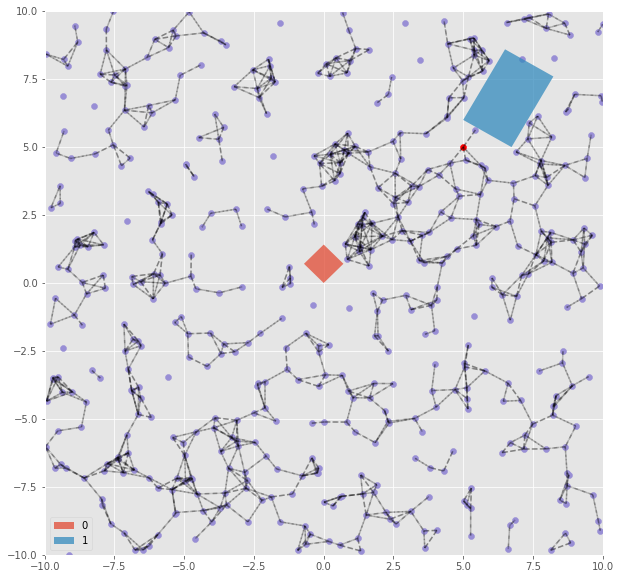

In [7]:
g.plot()